# Loading/Manipulating excel data with Pandas

### Emergence data

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

data_loc = '../data/sampling_details.xlsx'

release_date = pd.Timestamp('2005-03-13')

# load the sentinel fields sheet
sentinel_fields_data = pd.read_excel(data_loc,sheetname='Kal-sentinels-raw')
# rename the headings with spaces in them
sentinel_fields_data.rename(columns={"Field descrip":"descrip","date emerged":"date", 
                                     "Field ID (jpgs)": "id",
                                     "Field ID (paper)":"paperid"}, inplace=True)
sentinel_fields_data.drop('descrip',1,inplace=True)
sentinel_fields_data.drop('paperid',1,inplace=True)
sentinel_fields_data.sort_values(['id','date'], inplace=True)
# get sum of all the emergences
col_list = list(sentinel_fields_data)
for name in ['id','date']:
    col_list.remove(name)
sentinel_fields_data['All_total'] = sentinel_fields_data[col_list].sum(axis=1)
# get the number of E Hayati emergences per day
sentinel_fields_data['E_total'] = sentinel_fields_data[['Efemales','Emales']].sum(axis=1)
sentinel_fields_data['datePR'] = sentinel_fields_data['date'] - release_date
#print(sentinel_fields_data['datePR'].min().days)
#day29 = pd.Timedelta('29 days')
#sentinel_fields_data[sentinel_fields_data['datePR']==day29]['E_total'].values
#PR29 = sentinel_fields_data['datePR'] == day29
#sentinel_fields_data[PR29]
sentinel_fields_data
#sentinel_fields_data[sentinel_fields_data['E_total']>0].plot.scatter(x='Wfnum',y='E_total')

,id,date,Efemales,Emales,morpho1,morpho2,morpho3,morpho4,morpho5,morpho6,Wfnum,All_total,E_total,datePR
10,B,2005-04-03,0,0,2,0,0,0,0,0,4,6,0,21 days
11,B,2005-04-05,1,0,2,5,0,0,0,0,41,49,1,23 days
12,B,2005-04-07,4,2,1,0,0,0,0,0,21,28,6,25 days
13,B,2005-04-09,0,0,0,0,0,0,1,0,53,54,0,27 days
14,B,2005-04-11,1,0,0,0,0,0,0,0,11,12,1,29 days
15,B,2005-04-13,2,1,0,0,0,0,1,0,0,4,3,31 days
16,B,2005-04-16,0,0,0,0,0,0,0,0,0,0,0,34 days
17,B,2005-04-18,0,0,0,0,0,0,0,0,0,0,0,36 days
18,B,2005-04-20,0,0,0,0,0,0,0,0,0,0,0,38 days
19,B,2005-04-22,0,0,0,0,0,0,0,0,0,0,0,40 days


In [14]:
release_field_data = pd.read_excel(data_loc,sheetname='Kal-releasefield-raw')
# in our data, North was on the left of the grid. So switch coordinates
release_field_data['temp'] = release_field_data['xcoord']
release_field_data['xcoord'] = release_field_data['ycoord']
release_field_data['ycoord'] = -release_field_data['temp'] # need to flip orientation
release_field_data.drop('temp',1,inplace=True)
# put release point at the origin
release_field_data['ycoord'] += 300
release_field_data['xcoord'] -= 200
col_list = list(release_field_data)
for name in ['Field','xcoord','ycoord','date emerged']:
    col_list.remove(name)
release_field_data['All_total'] = release_field_data[col_list].sum(axis=1)
release_field_data['E_total'] = release_field_data[['Efemales','Emales']].sum(axis=1)
release_field_data['datePR'] = release_field_data['date emerged'] - release_date
release_field_data.drop('Field',1,inplace=True)
#release_field_data['ycoord'].values
release_field_data.sort_values(['datePR','xcoord','ycoord'],inplace=True)
print(release_field_data['datePR'].map(lambda t: t.days).unique())
#release_field_data

[21 23 25 27 29 31 34 36 38 40]


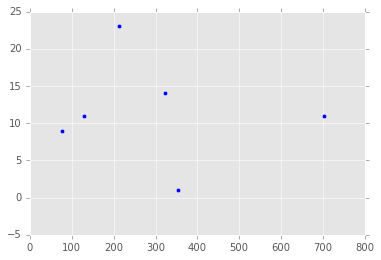

In [28]:
field_totals = []
E_totals = []
for field in sentinel_fields_data['id'].unique():
    field_totals.append(sentinel_fields_data[sentinel_fields_data['id']==field]['Wfnum'].sum(axis=0))
    E_totals.append(sentinel_fields_data[sentinel_fields_data['id']==field]['E_total'].sum(axis=0))
plt.scatter(field_totals,E_totals)
plt.show()

### Observation data

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np

data_loc = '../data/adult_counts_kalbar.xlsx'

release_date = pd.Timestamp('2005-03-13')

# load the grid adult counts sheet
grid_obs = pd.read_excel(data_loc,sheetname='adult counts field A')
# rename the headings with spaces in them
grid_obs.rename(columns={"x coor":"x","y coor":"y", 
                                     "num leaves viewed": "leaves",
                                     "num hayati":"obs_count"}, inplace=True)
# we don't really care about the leaf num columns
grid_obs = grid_obs[['date','collector','x','y','leaves','obs_count']]
# in our data, North was on the left of the grid. So switch coordinates
grid_obs['xcoord'] = grid_obs['y']
grid_obs['ycoord'] = -grid_obs['x'] # need to flip orientation
grid_obs.drop(['x','y'],1,inplace=True)
# put release point at the origin
grid_obs['ycoord'] += 300
grid_obs['xcoord'] -= 200
# convert date to datePR
grid_obs['datePR'] = grid_obs['date'] - release_date
grid_obs.sort_values(['datePR','xcoord','ycoord'],inplace=True)
# print(grid_obs['datePR'].map(lambda t: t.days).unique())
grid_obs.dtypes

date          datetime64[ns]
collector             object
leaves                 int64
obs_count              int64
xcoord                 int64
ycoord                 int64
datePR       timedelta64[ns]
dtype: object

In [9]:
# load the first cardinal directions sheet
cardinal_obs = pd.read_excel(data_loc,sheetname='cardinal 15 mar 05')
cardinal_obs.dtypes

date           datetime64[ns]
direction              object
distance                int64
num adults              int64
num viewers             int64
dtype: object